In [1]:
!pip install geopandas pygeos pysal --quiet

In [2]:
!pip install splot --quiet

In [3]:
!pip install contextily --quiet

In [4]:
# Votos para o Brexit
!wget https://geographicdata.science/book/_downloads/3c5d077df052a9a21915c1a938536f99/brexit_vote.csv

--2023-09-27 18:10:27--  https://geographicdata.science/book/_downloads/3c5d077df052a9a21915c1a938536f99/brexit_vote.csv
Resolving geographicdata.science (geographicdata.science)... 185.199.111.153, 185.199.108.153, 185.199.109.153, ...
Connecting to geographicdata.science (geographicdata.science)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48293 (47K) [text/csv]
Saving to: ‘brexit_vote.csv’

brexit_vote.csv     100%[===================>]  47,16K  --.-KB/s    in 0,05s   

2023-09-27 18:10:28 (859 KB/s) - ‘brexit_vote.csv’ saved [48293/48293]



In [5]:
# GeoJson das regiões de votacao do UK para o Brexit
!wget https://geographicdata.science/book/_downloads/860cf1380fe6cb15c80f882fad461a04/local_authority_districts.geojson

--2023-09-27 18:10:29--  https://geographicdata.science/book/_downloads/860cf1380fe6cb15c80f882fad461a04/local_authority_districts.geojson
Resolving geographicdata.science (geographicdata.science)... 185.199.108.153, 185.199.109.153, 185.199.111.153, ...
Connecting to geographicdata.science (geographicdata.science)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1478332 (1,4M) [application/geo+json]
Saving to: ‘local_authority_districts.geojson’

local_authority_dis 100%[===================>]   1,41M  4,50MB/s    in 0,3s    

2023-09-27 18:10:30 (4,50 MB/s) - ‘local_authority_districts.geojson’ saved [1478332/1478332]



In [6]:
import pandas as pd
import geopandas as gpd


/home/bernardo/Documents/insper8thSem/GeoRef/geopy/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_6589/1269724922.py:2: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, i

In [7]:
ref = pd.read_csv('../Data/Brexit/brexit_vote.csv', index_col='Area_Code')

In [8]:
ref.head(3)

,id,Region_Code,Region,Area,Electorate,ExpectedBallots,VerifiedBallotPapers,Pct_Turnout,Votes_Cast,Valid_Votes,Remain,Leave,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected
Area_Code,,,,,,,,,,,,,,,,,,,,
E06000031,108,E12000006,East,Peterborough,120892,87474,87469,72.35,87469,87392,34176,53216,77,0,32,7,38,39.11,60.89,0.09
E06000032,109,E12000006,East,Luton,127612,84633,84636,66.31,84616,84481,36708,47773,135,0,85,0,50,43.45,56.55,0.16
E06000033,112,E12000006,East,Southend-on-Sea,128856,93948,93939,72.90,93939,93870,39348,54522,69,0,21,0,48,41.92,58.08,0.07


In [9]:
lads = gpd.read_file('local_authority_districts.geojson').set_index('lad16cd')

In [10]:
lads.head(3)

,objectid,lad16nm,lad16nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
lad16cd,,,,,,,,,,
E06000001,1,Hartlepool,NaN,447157,531476,-1.27023,54.676159,0.013041,0.879421,"MULTIPOLYGON (((-1.27024 54.72716, -1.38088 54..."
E06000002,2,Middlesbrough,NaN,451141,516887,-1.21099,54.544670,0.007484,0.535764,"MULTIPOLYGON (((-1.23001 54.58410, -1.28158 54..."
E06000003,3,Redcar and Cleveland,NaN,464359,519597,-1.00611,54.567520,0.034014,1.266847,"MULTIPOLYGON (((-1.13716 54.64693, -1.13256 54..."


In [11]:
lads.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
db = gpd.GeoDataFrame(

    lads.join(ref[['Pct_Leave']]), crs = lads.crs).to_crs(epsg=3857)[['objectid', 'lad16nm',
                                                                      'Pct_Leave', 'geometry']].dropna()

In [14]:
db.head(3)

,objectid,lad16nm,Pct_Leave,geometry
lad16cd,,,,
E06000001,1,Hartlepool,69.57,"MULTIPOLYGON (((-141402.215 7309092.065, -1537..."
E06000002,2,Middlesbrough,65.48,"MULTIPOLYGON (((-136924.099 7281563.141, -1426..."
E06000003,3,Redcar and Cleveland,66.19,"MULTIPOLYGON (((-126588.382 7293641.928, -1260..."


In [15]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

<Axes: >

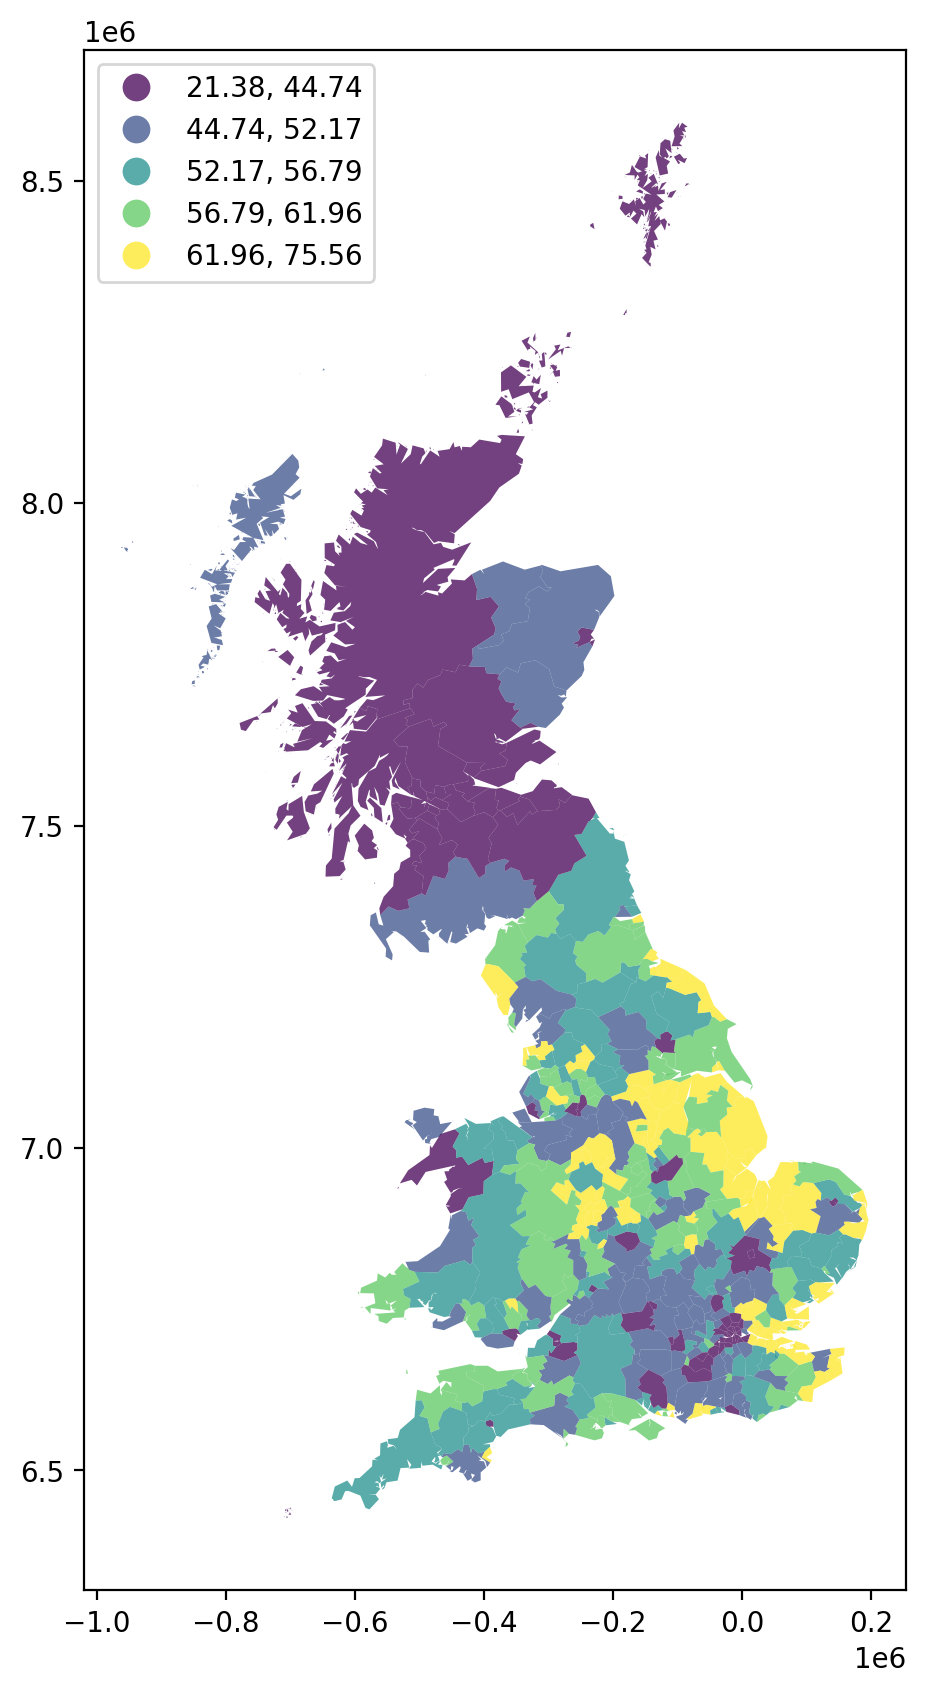

In [16]:
f, ax = plt.subplots(1, figsize=(20,10))
db.plot(column = 'Pct_Leave',
        cmap = 'viridis',
        scheme = 'quantiles',
        k = 5,
        edgecolor = 'white',
        linewidth=0.,
        alpha=0.75,
        legend=True,
        legend_kwds={'loc':2},
        ax = ax)

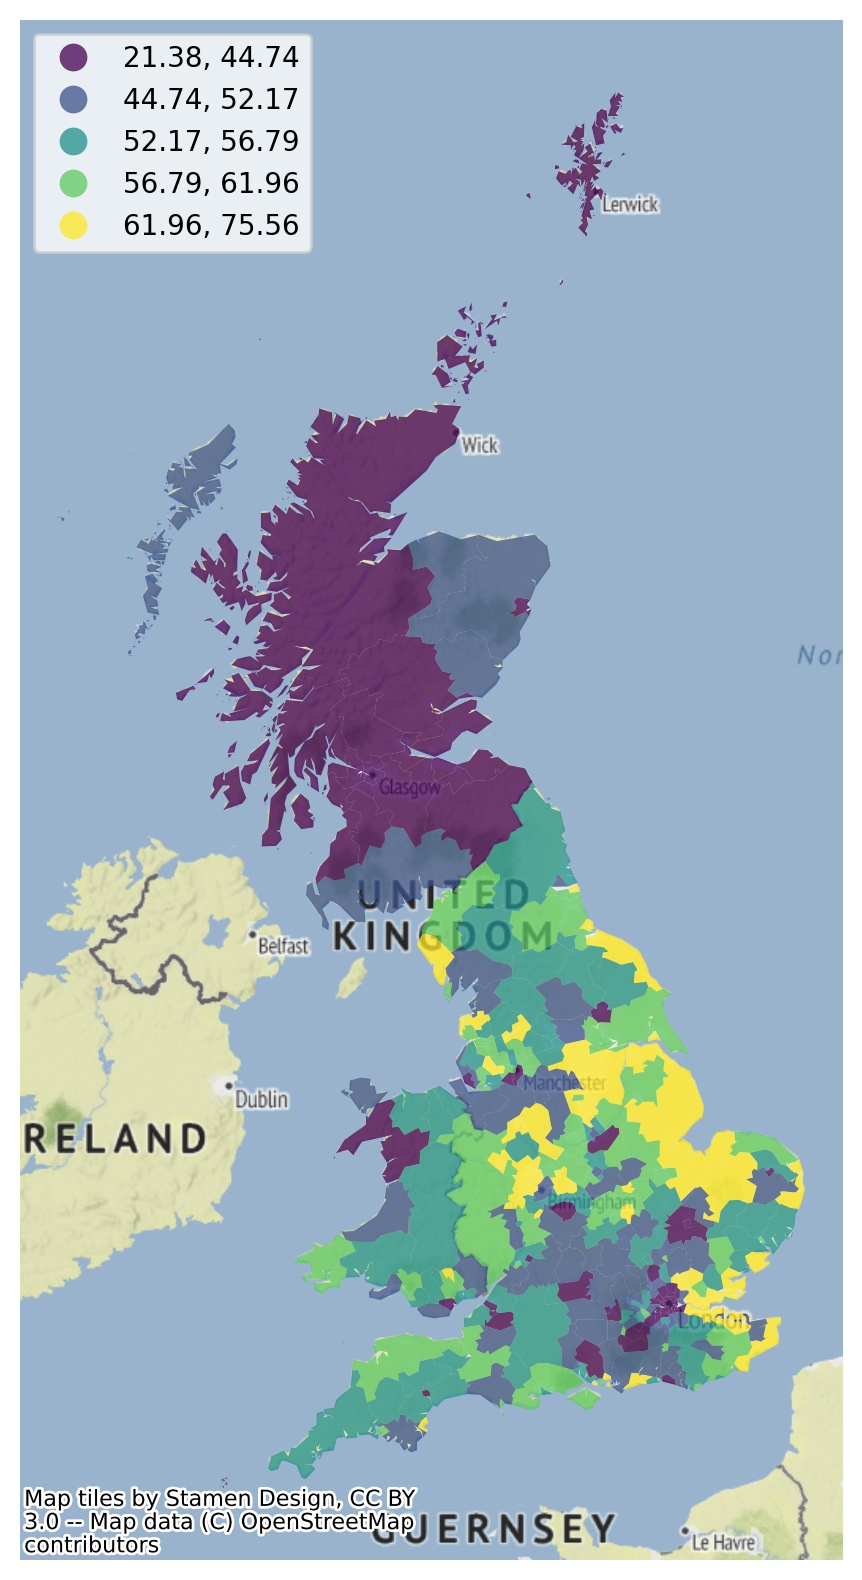

In [17]:
import contextily
f, ax = plt.subplots(1, figsize=(20,10))
db.plot(column = 'Pct_Leave',
        cmap = 'viridis',
        scheme = 'quantiles',
        k = 5,
        edgecolor = 'white',
        linewidth=0.,
        alpha=0.75,
        legend=True,
        legend_kwds={'loc':2},
        ax = ax)

contextily.add_basemap(ax,
                       crs=db.crs,

                      )
ax.set_axis_off()

In [18]:
from pysal.viz import splot
from splot.esda import plot_moran
import contextily
# Analysis
import geopandas as gpd
import pandas as pd
from pysal.explore import esda
from pysal.lib import weights
from numpy.random import seed

/home/bernardo/Documents/insper8thSem/GeoRef/geopy/lib/python3.10/site-packages/libpysal/cg/alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
/home/bernardo/Documents/insper8thSem/GeoRef/geopy/lib/python3.10/site-packages/libpysal/cg/alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
/ho

# Matriz de pesos

In [19]:
w = weights.KNN.from_dataframe(db, k = 8) ### peso por distância

In [20]:
# curisoidade
qW = weights.Queen.from_dataframe(db)

/home/bernardo/Documents/insper8thSem/GeoRef/geopy/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 6 islands with ids: 46, 52, 331, 339, 342, 358.
  warnings.warn(message)


In [21]:
# é preciso normalizar a matriz de pesos

In [22]:
w.transform = 'R'

# Média móvel espacial

In [23]:
db['Pct_Leave_lag'] = weights.spatial_lag.lag_spatial(w, db['Pct_Leave'])

In [24]:
db.head(3)

,objectid,lad16nm,Pct_Leave,geometry,Pct_Leave_lag
lad16cd,,,,,
E06000001,1,Hartlepool,69.57,"MULTIPOLYGON (((-141402.215 7309092.065, -1537...",60.92125
E06000002,2,Middlesbrough,65.48,"MULTIPOLYGON (((-136924.099 7281563.141, -1426...",61.02625
E06000003,3,Redcar and Cleveland,66.19,"MULTIPOLYGON (((-126588.382 7293641.928, -1260...",60.65125


In [25]:
db.loc[['E08000012', 'S12000019'],
       ['Pct_Leave', 'Pct_Leave_lag']]

,Pct_Leave,Pct_Leave_lag
lad16cd,,
E08000012,41.81,54.61375
S12000019,37.94,38.01875


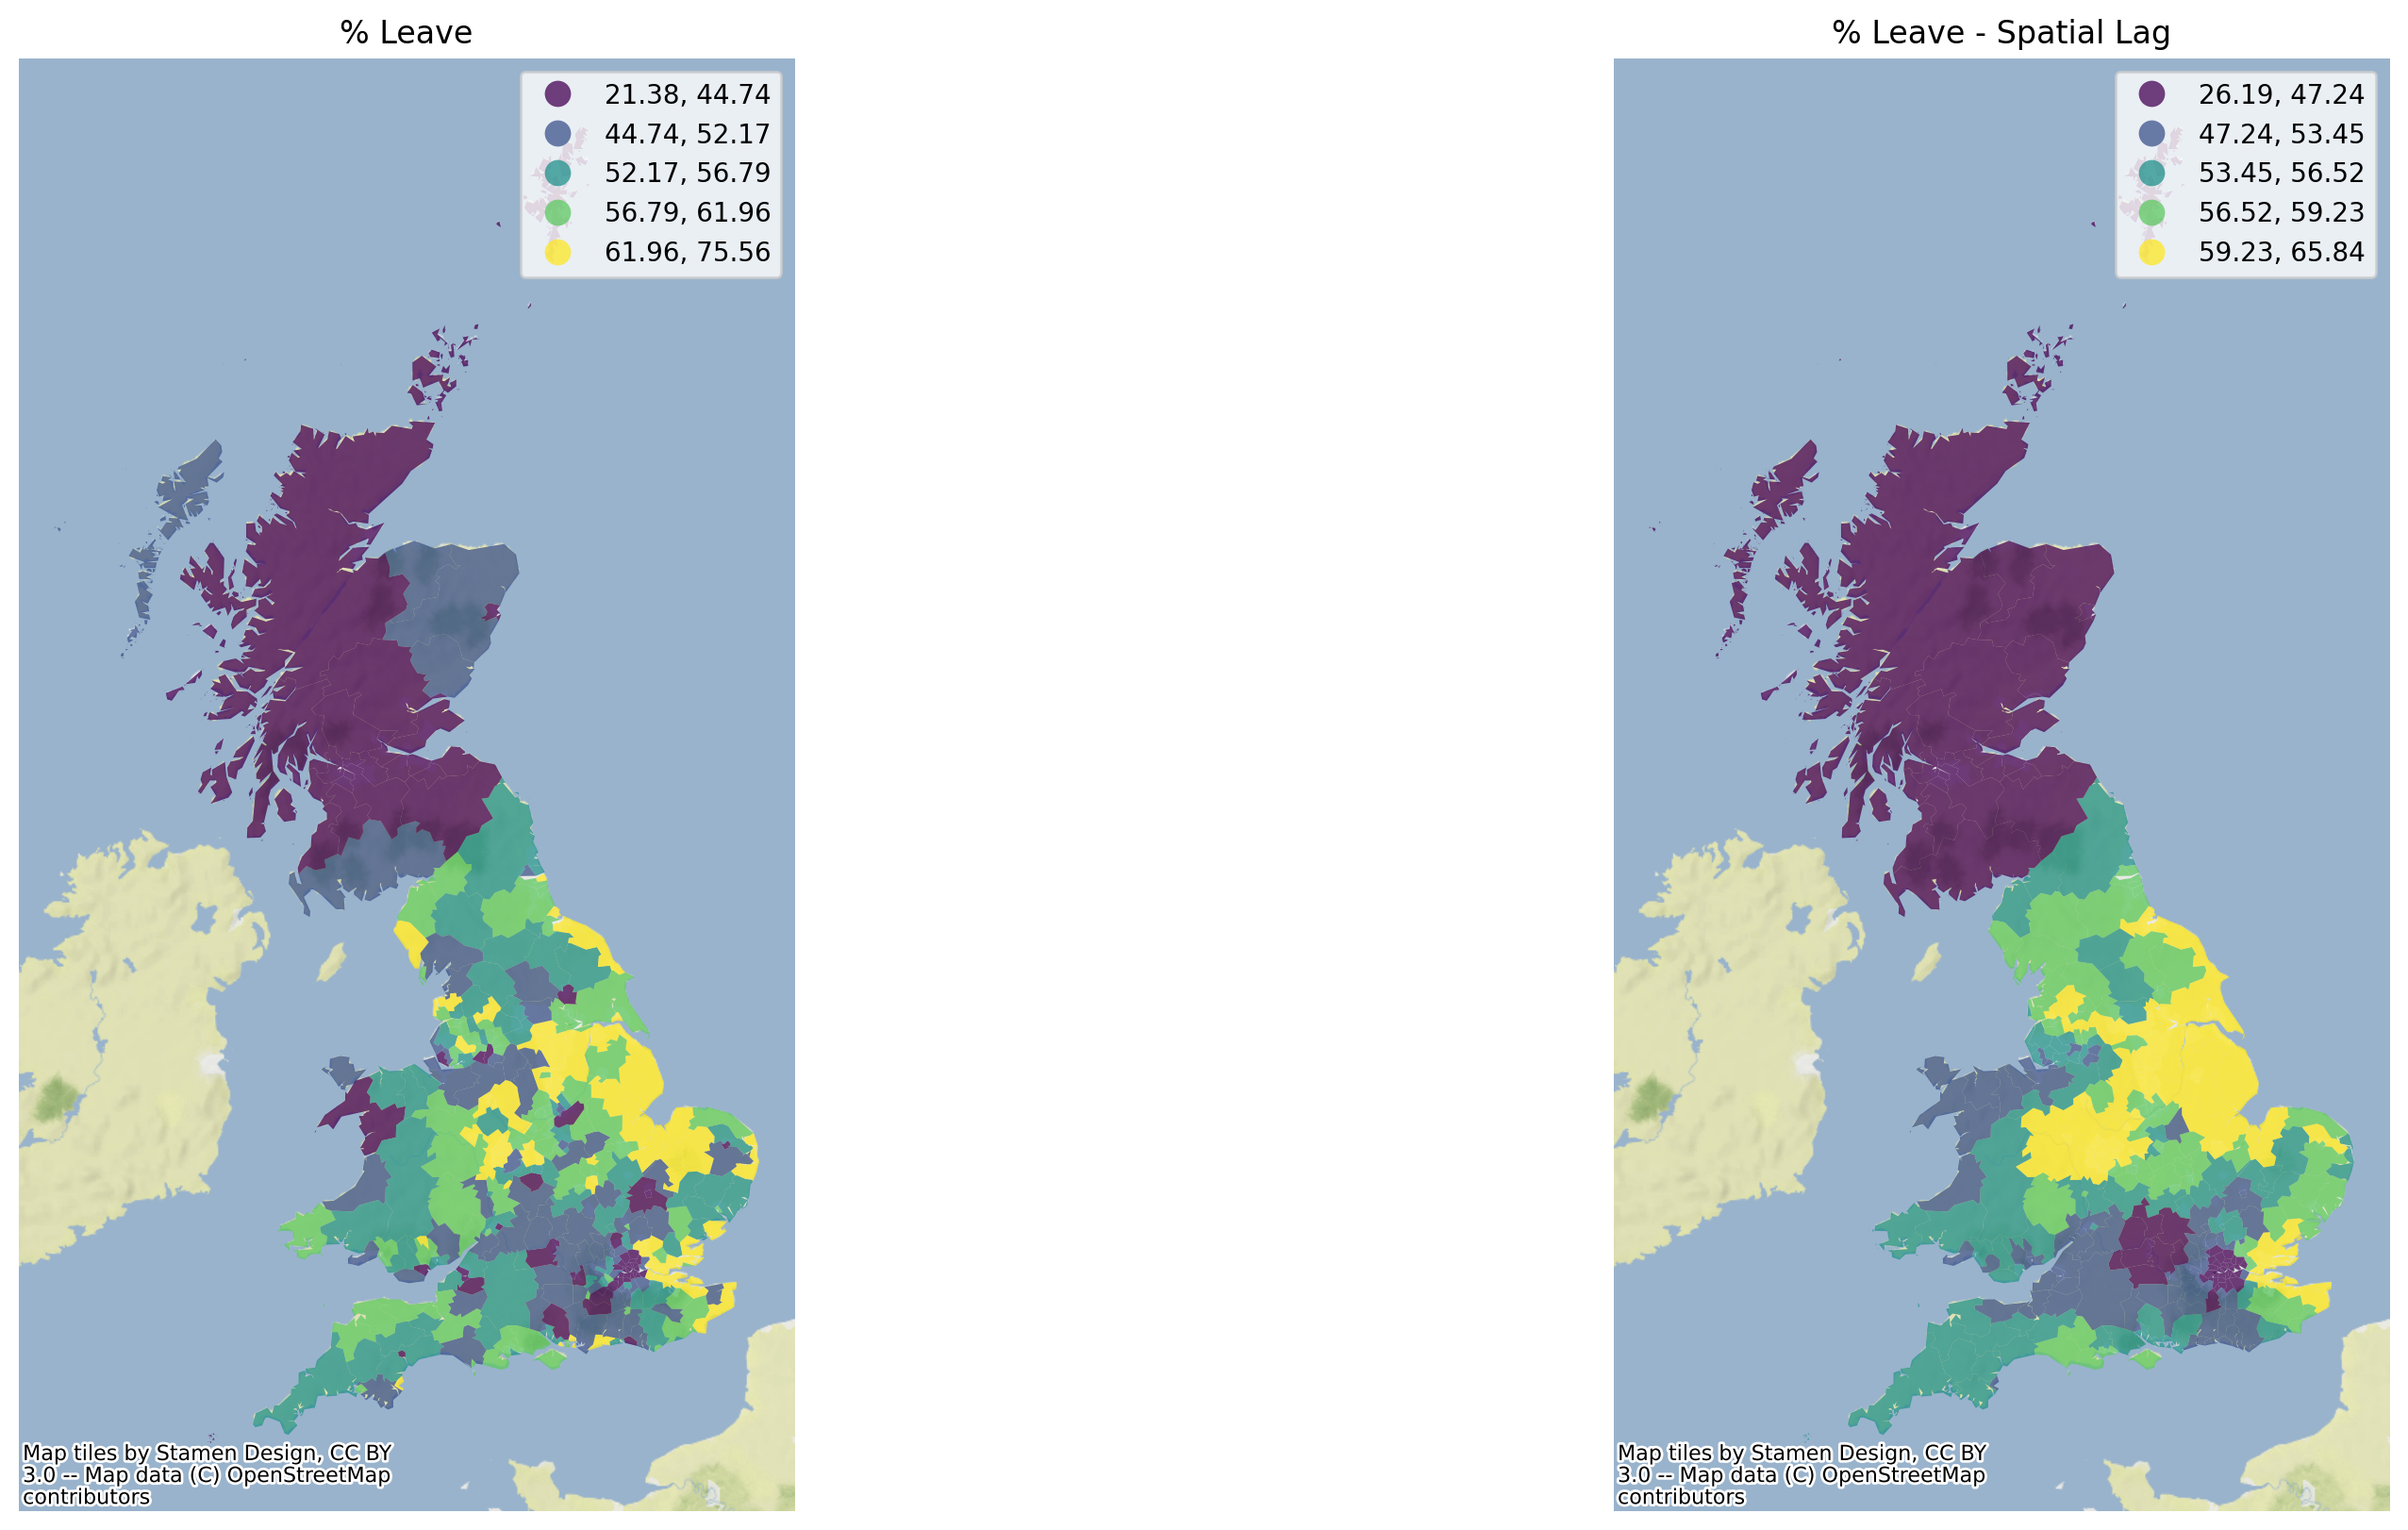

In [26]:
f, axs = plt.subplots(1, 2, figsize=(20,10))
ax1, ax2 = axs

db.plot(column='Pct_Leave', cmap = 'viridis', scheme='quantiles', k = 5,
        edgecolor='white', linewidth=0.0, alpha=0.75, legend=True, ax=ax1)
ax1.set_axis_off()
ax1.set_title('% Leave')
contextily.add_basemap(ax1,
                       crs=db.crs,
                       source=contextily.providers.Stamen.TerrainBackground,

                      )

db.plot(column='Pct_Leave_lag', cmap='viridis', scheme='quantiles',
        k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax2)
ax2.set_axis_off()
ax2.set_title("% Leave - Spatial Lag")
contextily.add_basemap(ax2,
                       crs=db.crs,
                       source=contextily.providers.Stamen.TerrainBackground,

                      )

plt.show()

# Moran I

In [27]:
from esda.moran import Moran

In [28]:
moran = Moran(db['Pct_Leave'], w)

In [29]:
moran.I

0.6454521298096587

In [30]:
from splot.esda import moran_scatterplot

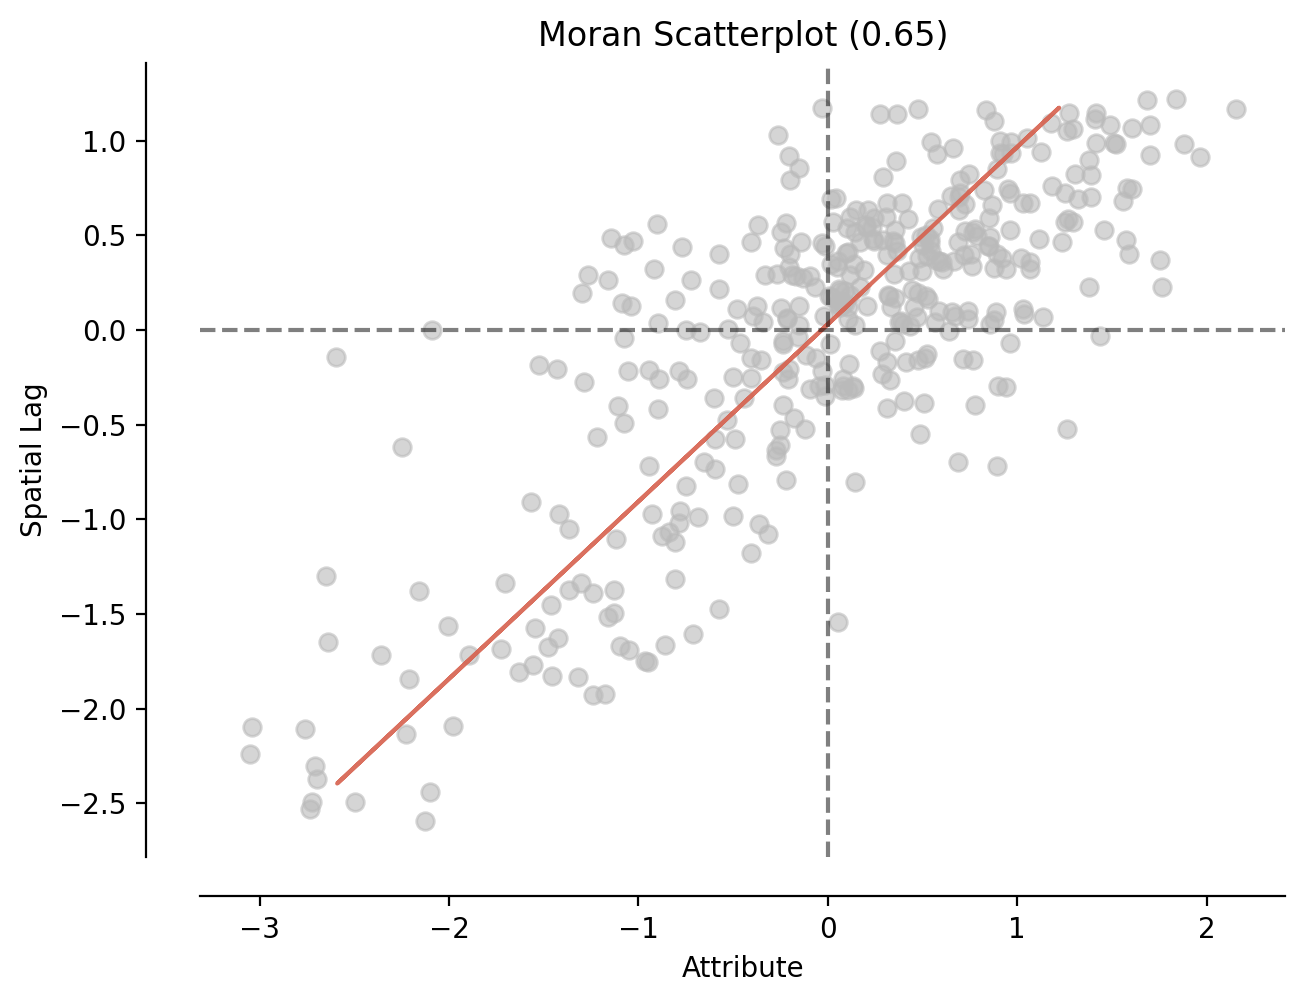

In [31]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

/home/bernardo/Documents/insper8thSem/GeoRef/geopy/lib/python3.10/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


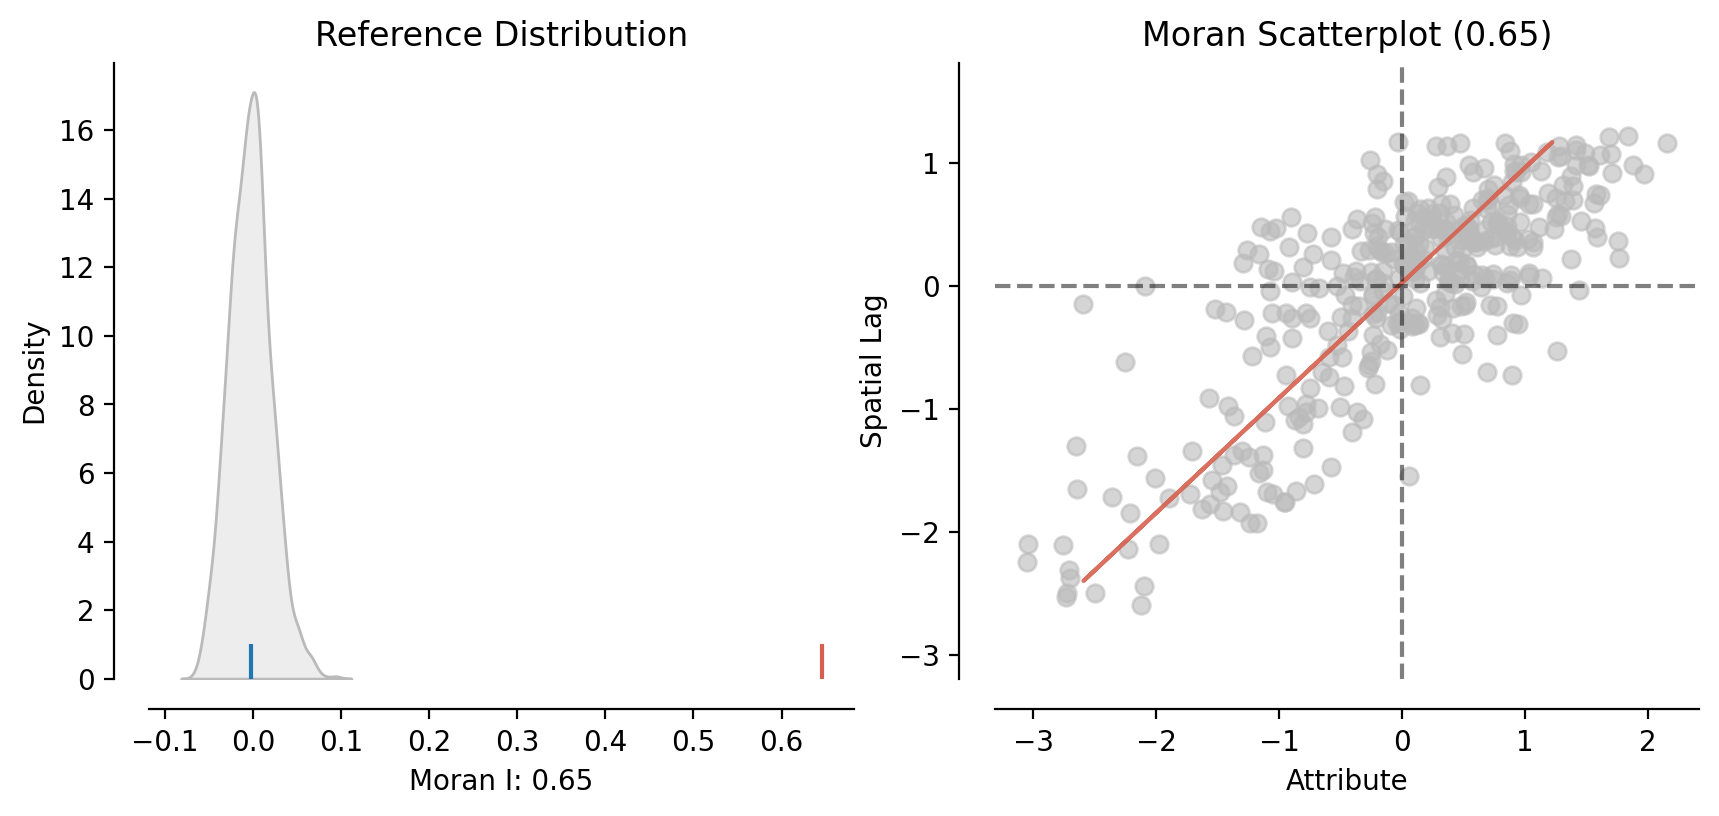

In [32]:
from splot.esda import plot_moran

plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

# LISA

In [33]:
from esda.moran import Moran_Local

In [34]:
moran_loc = Moran_Local(db['Pct_Leave'], w)

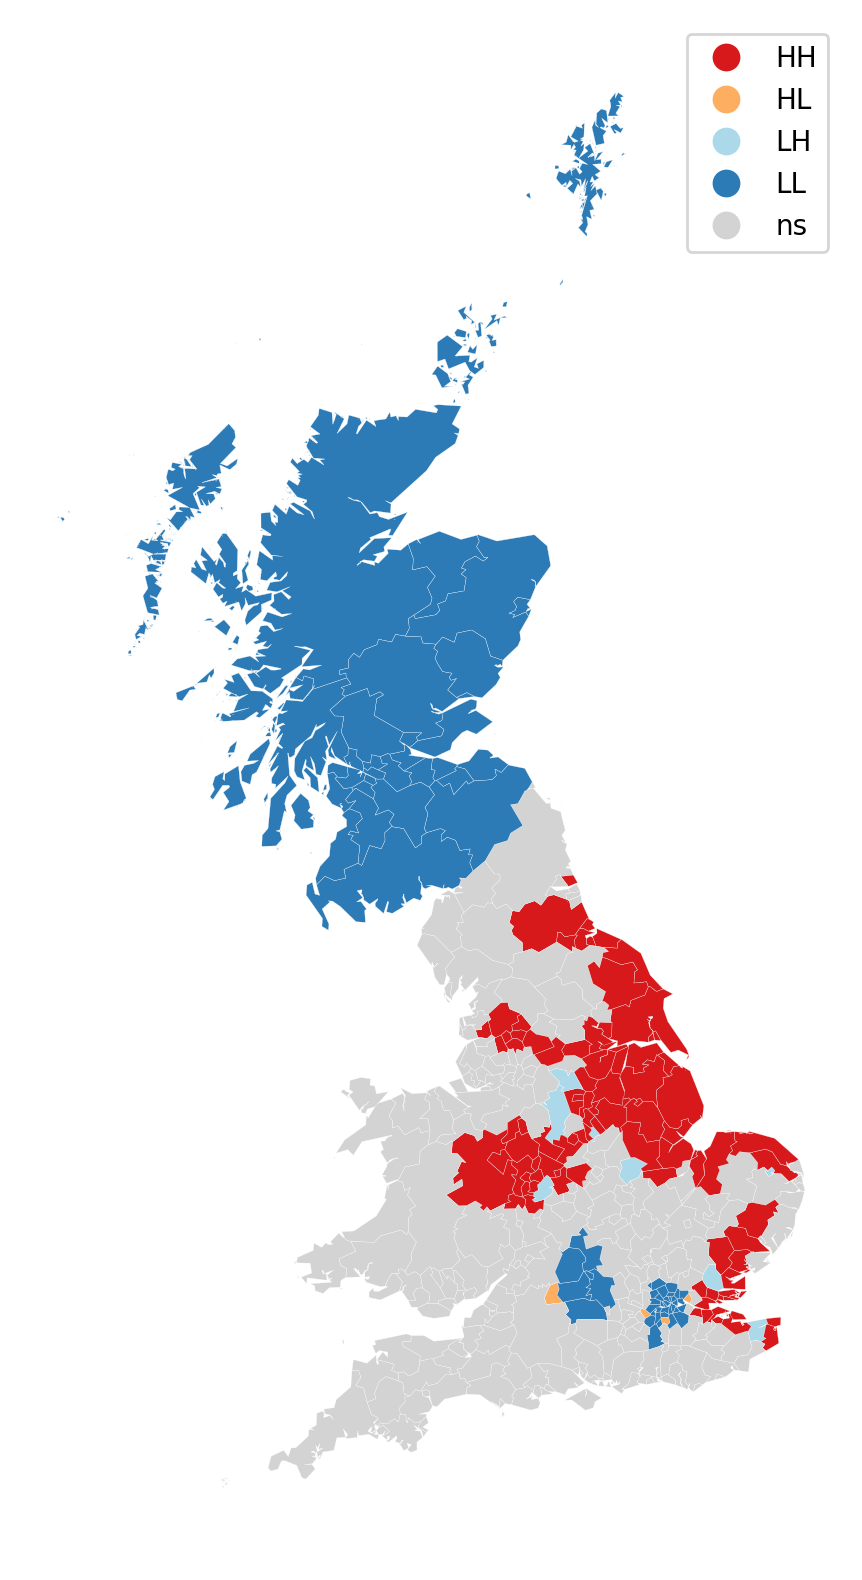

In [35]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc, db, p=0.05, figsize = (10,10))
plt.show()

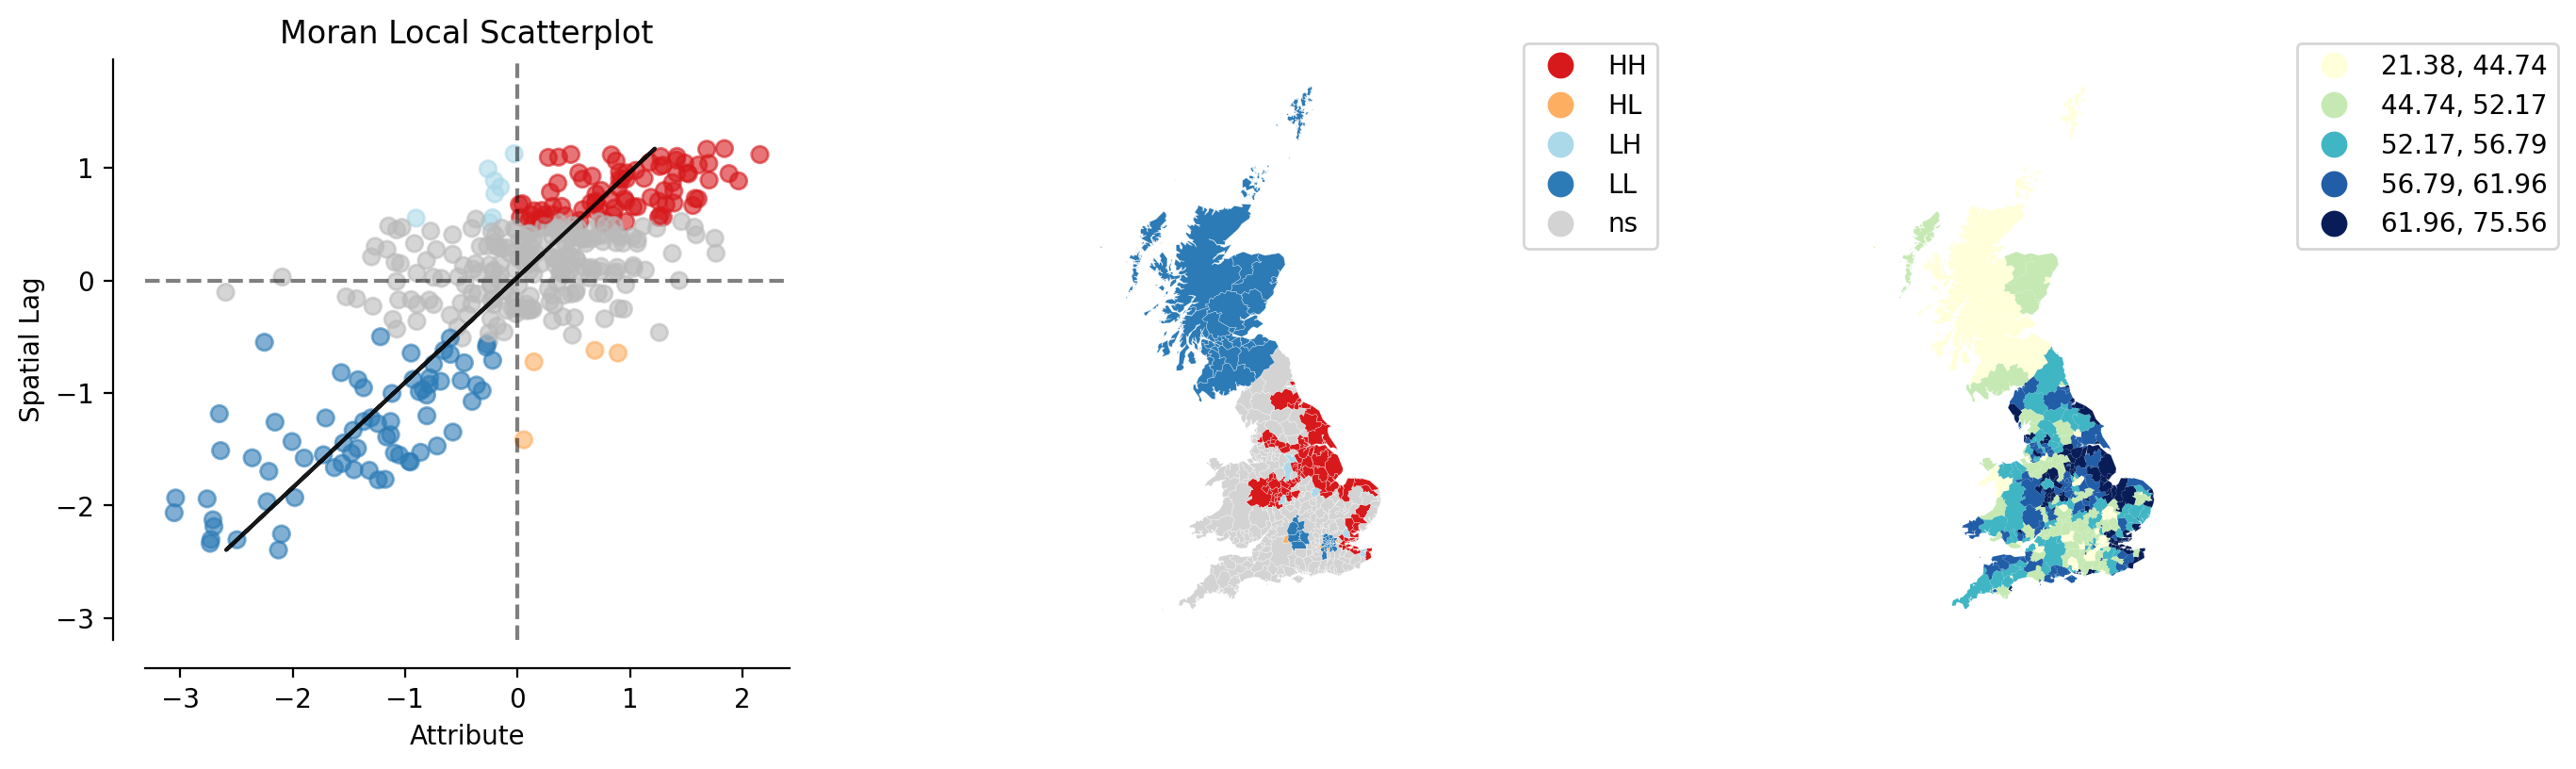

In [36]:
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc, db,
                           'Pct_Leave')
plt.show()